# Softmax Regression

In classification, we are primarily concerned with the question of "which one". E.g., is an email spam, is a customer likely to sign up for a subscription or not, what does the image show? 

The term classification is usually overloaded to mean two different things, one in which we are strictly only interested in the hard categorisation into classes, and a subtly different problem where we are interested in the probability/likelihood that each category applies. The waters tend to get muddied here a little because we often predict the probability before assigning a hard classification in practise. (hard assignments vs soft assignments). 

Furthermore, there are situations where more than one label may be applicable. For example a news article may cover the the categories of science, space flight and economics, but not sport or medicine. Classifying such an article into only one category would not be super helpful. Known as multi-label classification. 

## Classification

Assume each input consists of a 2x2 image with four scalar values, so we have 4 inputs, lets assume that each the pixels correspond to the labels, cat, dog and chicken. 

Have to choose how to represent the labels mathematically, it may be tempting to use an ordinal encoding, i.e. {1, 2, 3} which is a reasponable way of _storing_ the variables, but implies an ordering to the categories which is inappropriate for machine learning. Instead, the _one hot_ encoding is approriate, where we have a vector of the same length as the number of categories which is 0 everywhere except 1 to indicate the category. 

e.g. $(1, 0, 0)$ for cat $(0, 1, 0)$ for dog and $(0, 0, 1)$ for chicken. 

### Linear model

To address categorisation with linear models, we need as many affine functions (an affine function is a linear function with a constant/intercept specified), as we have outputs. In our case, we have 3 output categories and 4 input features, so we need 3 biases and 12 weights (one for each connection between the input feature and the output). The functions can be written explicityly in this case

$$O_1 = x_1w_1 + x_2w_2 + x_3w_3 + x_4w_4 + b1$$
$$O_2 = x_1w_5 + x_2w_6 + x_3w_7 + x_4w_8 + b2$$
$$O_3 = x_1w_9 + x_2w_{10} + x_3w_{11} + x_4w_{12} + b2$$

This can be represented by the neural network diagram below. Just like in the linear regression, we use a single layer neural network. Since the calculation of each output dpeends on every input the output layer can be described as "fully connected"

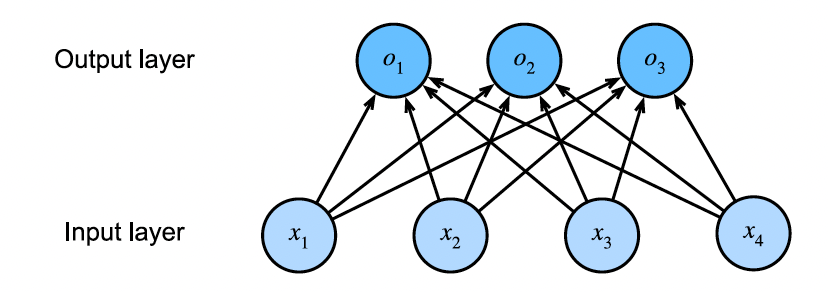

We can concisely represent this as $\mathbf{o} = \mathbf{Wx + b}$ where the weight have been gathered into a 3 x 4 matrix $\mathbf{W}$ and the biases into a vector $\mathbf{b}$.

### The Softmax

We could try to design a loss function and directly optimize the difference between $\mathbf{y}$ and $\mathbf{o}$, and indeed this can work well within some limitations, but we would find that it is unsatisfactory for a number of reasons.

1. There is no guarantee that the weights add up to 1, as we would expect probabilities to
2. Even if they add up to one, there's no guarantee that they're even non-negative.

As such, we need some method to squash the outputs. One way to ensure that the probabilities positive is to use an exponential function, i.e $P(y=i) \propto exp(o_i)$. We can then ensure that the probabilities sum to 1 by normalising by the sum of the probabilities. Combinign these two featues gives the _softmax_ function:

$$ softmax(o_i) = \frac{exp(o_i)}{\sum_{j}o_j}.$$

In this, the largest coordinate of $\mathbf{o}$ corresponds to the most likely class. We don't even need to take the softmax (what???) to determine the class with the highest probability, just the argmax of the outputs... (idk, maybe this becomes clearer later). 

### Vectorisation

To save computation efficiency, we vectorise this into minibatches of data:

$$ \mathbf{O} = \mathbf{XW} + \mathbf{b} $$
and 

$$ \mathbf{\hat{Y}} = \mathrm{softmax}(\mathbf{O}) $$

## Loss Function

### Log Likelihood

We derive a loss function using maximum likelihood estimation. We aim to minimise the negative log likelihood for mathematical convenience.

$$ -\mathrm{log}(\mathbf{Y}|\mathbf{X}) = \sum_{i=1}^{n} -\mathrm{log}P(\mathbf{y}^{(i)} | \mathbf{x}^{(i)})  = \sum_{i=1}^{n} l(\mathbf{y}^{(i)}, \mathbf{\hat{y}}^{(i)}) $$

where the loss function l is:

$$ l(\mathbf{y}, \mathbf{\hat{y}}) = - \sum_{j=1}^{q} y_i \mathrm{log}(\hat{y}_i) $$

This loss function is commonly called the _cross entropy loss function_. Since $\mathbf{y}$ is a one-hot encoded vector with length q, the loss function is zero for all but one term. Note that this loss is bounded from below by 0 whenever y is a probability vecotr, as no single term can be greater than 1. 

### Softmax and cross-entropy loss

Plugging in the expression for the softmax, we arrive at the expression which will actually be used for the loss function...

$$ l(\mathbf{y}, \mathbf{\hat{y}}) = \sum_{k = 1}^{q} \mathrm{o_k} - \sum_{j = 1}^{q} y_jo_j $$

considering for a moment the graident of this expression, we get:

$$ \partial_{o_j}l(\mathbf{y}, \mathbf{\hat{y}}) = \frac{\mathrm{exp}(o_j)}{\sum_{k=1}^q(o_k)} - y_i = \mathrm{softmax}(\mathbf{o})_j - y_j $$

that is to say, the derivative is the difference between our model prediction probability (as expressed by a softmax) and the true class $y_i$, which is remarkably similar to the case for regression. 

## Information Theory Basics

Many deep learning papers use terminology and intuition from information theory. Lets cover some of this basic common language...

_Information theory_ covers the problems of encoding, decoding, transmitting and manipulating information (data). 

#### Entropy

For a distribution $P$, its entropy $H[P]$ is given by:

$$ H[P] = \sum_j -P(j) \mathrm{log}P(j)$$. 

One of the fundamental theorems of information theory is that in order to encode data drawn randomly from the distribution P, we require $H[P]$ 'nats' to do the encoding, a nat being the equivalent of a bit, but with a numbering system in base $e$ instead of base 2. 

#### Surprisal 

When anticipating what the next byte/character might be in a datastream, surprisal is a measure of the probability of an event if it is not the most likely bit. The less likely the event the higher our surprisal. The entropy is the expected surprisal. (maybe i need to read a more detailed explanation of this). 

#### Cross-entropy revisited

So we can see the cross-entropy as either "maximising the likelihood of the predictions" or "minimising the surprisal". 